In [59]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import importlib
import tikzplotlib


from src import anchor_matrix

#plt.style.use("ggplot")

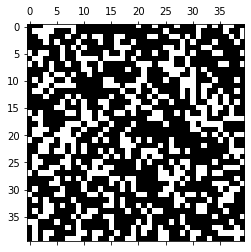

In [102]:
def genBenchmarkMatrix(n=40):
  rng = np.random.default_rng(0)
  M = rng.integers(low=0, high=(10+1), size=(n,n))
  return M > 3

M = genBenchmarkMatrix()
plt.spy(M);

In [3]:
importlib.reload(anchor_matrix);

In [104]:
c = anchor_matrix._biclique_find_all(M)
print(len(c))

276554


8 at 508/276554 (0.0018368926141006819)


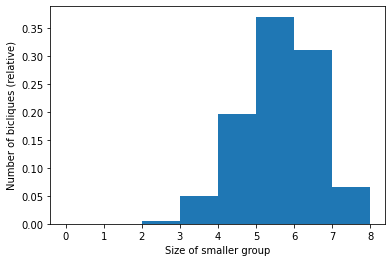

In [108]:
smallerSize = np.array([min(len(R), len(C)) for R, C in c])

mx = np.max(smallerSize)
cnt = np.sum(smallerSize == mx)
print(f"{mx} at {cnt}/{len(smallerSize)} ({cnt/len(smallerSize)})")

plt.hist(smallerSize, density=True, bins=np.arange(0, mx+1), label=list(map(str, np.arange(0, mx+1))))
#plt.grid(alpha=0.5)
#plt.title("Distribution of maximal biclique sizes")
plt.xlabel("Size of smaller group")
plt.ylabel("Number of bicliques (relative)")

tikzplotlib.save("data/distr_biclique_size.tex")

In [99]:
all_cliques = list(anchor_matrix._biclique_find_all_networkx(M))
smallerSize = [min(len(R), len(C)) for R, C in all_cliques]
bestInd = np.argmax(smallerSize)
best_clique = all_cliques[bestInd]

In [100]:
c = anchor_matrix.biclique_random(M)
print(c)

(array([36, 24, 21, 23,  7, 32,  4]), array([34, 31, 30, 19, 11]))


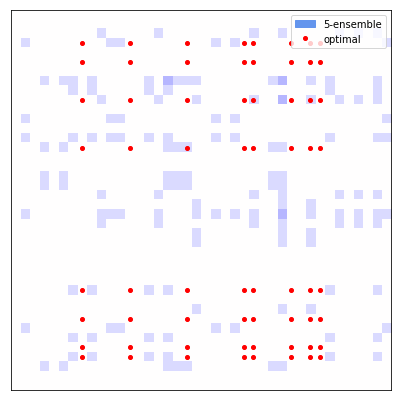

In [101]:
plt.figure(figsize=(7,7))
plt.spy(M, alpha=0.2)


MC = np.zeros_like(M, dtype=np.float64)
for _ in range(5):
  ind_row, ind_col = anchor_matrix.biclique_random(M)
  mask = np.zeros_like(M)
  mask[np.ix_(ind_row, ind_col)] = 1
  MC += mask
plt.imshow(-MC, cmap="bwr", alpha=1, vmin=-7, vmax=7)
mask = np.zeros_like(M)
mask[np.ix_(*best_clique)] = 1
# for i in range(mask.shape[0]):
#   for j in range(mask.shape[1]):
#     mask[i,j] = (i+j+1) % 2
plt.spy(mask, marker="o", color="red", markersize=4, label="optimal")
handles, labels = plt.gca().get_legend_handles_labels()
# manually define a new patch 
patch = matplotlib.patches.Patch(color='cornflowerblue', label='5-ensemble')
handles.insert(0, patch)

# add legend entry
plt.legend(handles=handles, loc='upper right');
#plt.axis()
plt.xticks([])
plt.yticks([])
plt.savefig('data/ensemble_vis.png', dpi=300)

